### Use SQL and Python, answer below questions:

1. Plot the distribution of the number of orders made by each customer in the whole dataset.
2. What are customers' favorite departments and Aisles
3. What is the best selling Aisles in each department based on number of orders
4. Draw a pie chart for the number of orders in each departments

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
aisles = pd.read_csv("aisles.csv")
departments = pd.read_csv("departments.csv")
order_products = pd.read_csv("order_products.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")

In [ ]:
print(aisles.shape)
print(departments.shape)
print(order_products.shape)
print(orders.shape)
print(products.shape)

In [ ]:
aisles_products = pd.merge(aisles, products, on = "aisle_id")

In [ ]:
ord_prod_ord = pd.merge(order_products, orders, on = "order_id")

In [ ]:
ais_prod_depart = pd.merge(aisles_products, departments, on="department_id")

In [ ]:
new = pd.merge(ais_prod_depart, ord_prod_ord, on = "product_id")
new.info()

In [59]:
new.head()

,aisle_id,aisle,product_id,product_name,department_id,department,order_id,add_to_cart_order,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,prepared soups salads,209,Italian Pasta Salad,20,deli,94246,5,114082,26,0,20,1.0
1,1,prepared soups salads,209,Italian Pasta Salad,20,deli,192465,2,119977,2,0,16,3.0
2,1,prepared soups salads,209,Italian Pasta Salad,20,deli,195206,18,1519,7,2,9,5.0
3,1,prepared soups salads,209,Italian Pasta Salad,20,deli,227717,1,161125,7,2,11,11.0
4,1,prepared soups salads,209,Italian Pasta Salad,20,deli,260072,13,12012,5,5,11,11.0


In [60]:
new.shape

(33819106, 13)

In [61]:
new.describe()

,aisle_id,product_id,department_id,order_id,add_to_cart_order,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.174104e+07
mean,7.121799e+01,2.557551e+04,9.918544e+00,1.710566e+06,8.367738e+00,1.029444e+05,1.713998e+01,2.737285e+00,1.343123e+01,1.136415e+01
std,3.819898e+01,1.409770e+04,6.281655e+00,9.874008e+05,7.139540e+00,5.946733e+04,1.749829e+01,2.093296e+00,4.246149e+00,8.940500e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.100000e+01,1.351900e+04,4.000000e+00,8.554130e+05,3.000000e+00,5.143500e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00
50%,8.300000e+01,2.525600e+04,9.000000e+00,1.710660e+06,6.000000e+00,1.026260e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00
75%,1.070000e+02,3.793500e+04,1.600000e+01,2.565587e+06,1.100000e+01,1.544120e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,1.340000e+02,4.968800e+04,2.100000e+01,3.421083e+06,1.450000e+02,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


1. Plot the distribution of the number of orders made by each customer in the whole dataset.

In [68]:
new['user_id'].value_counts('order_id')

201268    1.101448e-04
129928    1.090804e-04
164055    9.133890e-05
176478    8.728794e-05
186704    8.681483e-05
              ...     
159016    8.870725e-08
191768    8.870725e-08
196       8.870725e-08
144555    8.870725e-08
112788    8.870725e-08
Name: user_id, Length: 206209, dtype: float64

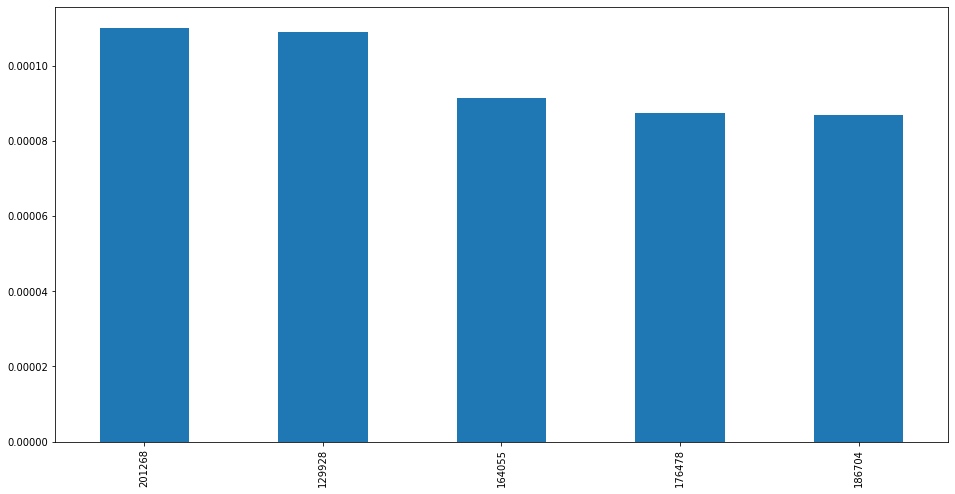

In [70]:
plt.figure(figsize=(16,8))
new['user_id'].value_counts('order_id').head().plot.bar()
plt.show()

2. What are customers' favorite departments and Aisles

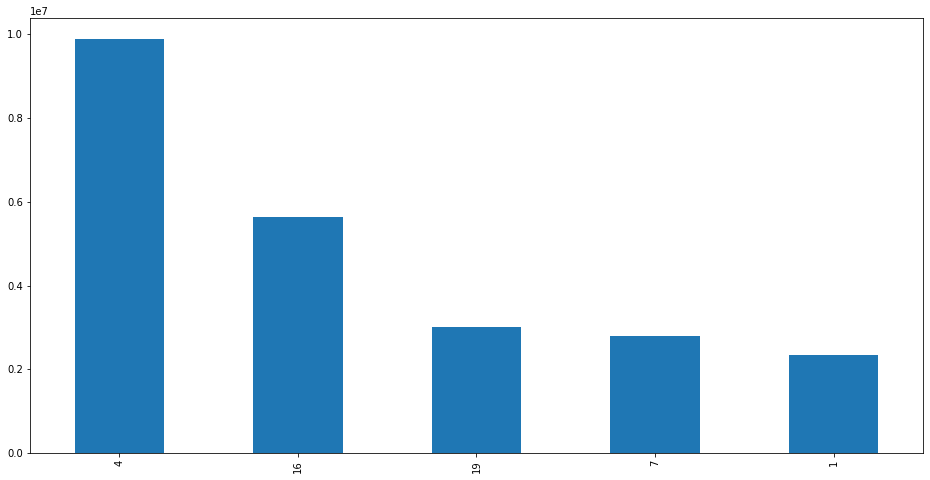

In [17]:
plt.figure(figsize=(16,8))
new['department_id'].value_counts().head(5).plot.bar()
plt.show()

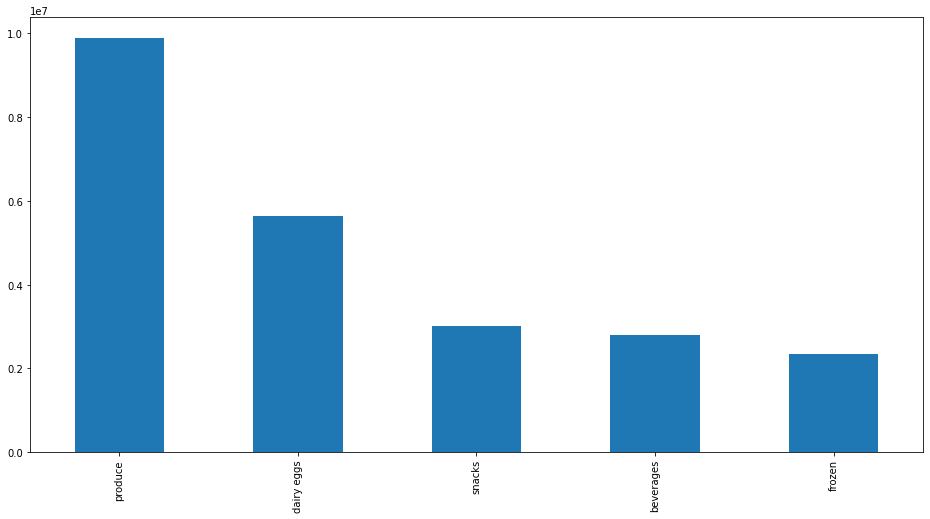

In [19]:
plt.figure(figsize=(16,8))
new['department'].value_counts().head(5).plot.bar()
plt.show()

Department produce whose department_id is 4 is customers' favorate department. 

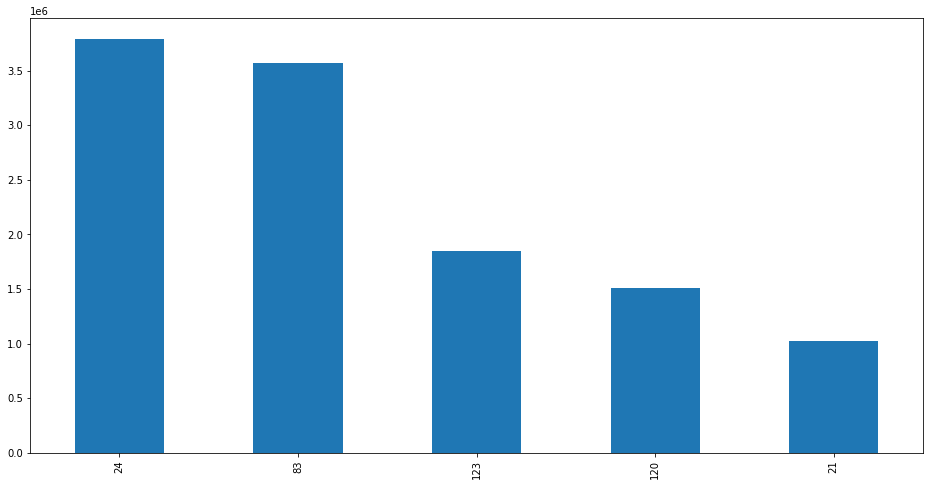

In [20]:
plt.figure(figsize=(16,8))
new['aisle_id'].value_counts().head(5).plot.bar()
plt.show()

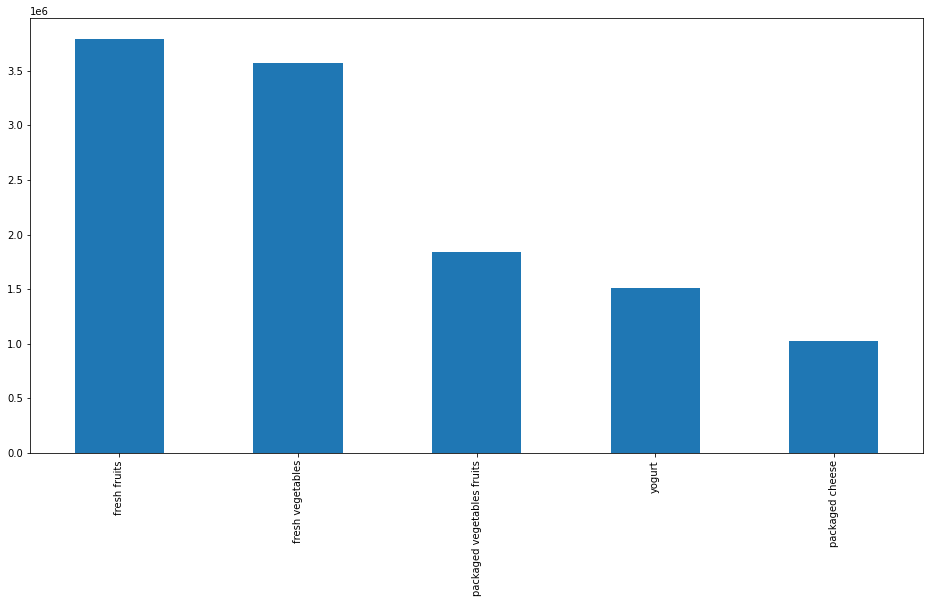

In [21]:
plt.figure(figsize=(16,8))
new['aisle'].value_counts().head(5).plot.bar()
plt.show()

fresh fruits whose aisle_id is 24 is customers' favorite aisle. 

3. What is the best selling Aisles in each department based on number of orders

In [72]:
new.groupby(['department_id','aisle_id'])['aisle_id'].value_counts('order_id')

department_id  aisle_id  aisle_id
1              34        34          1.0
               37        37          1.0
               38        38          1.0
               42        42          1.0
               52        52          1.0
                                    ... 
20             13        13          1.0
               14        14          1.0
               67        67          1.0
               96        96          1.0
21             100       100         1.0
Name: aisle_id, Length: 134, dtype: float64

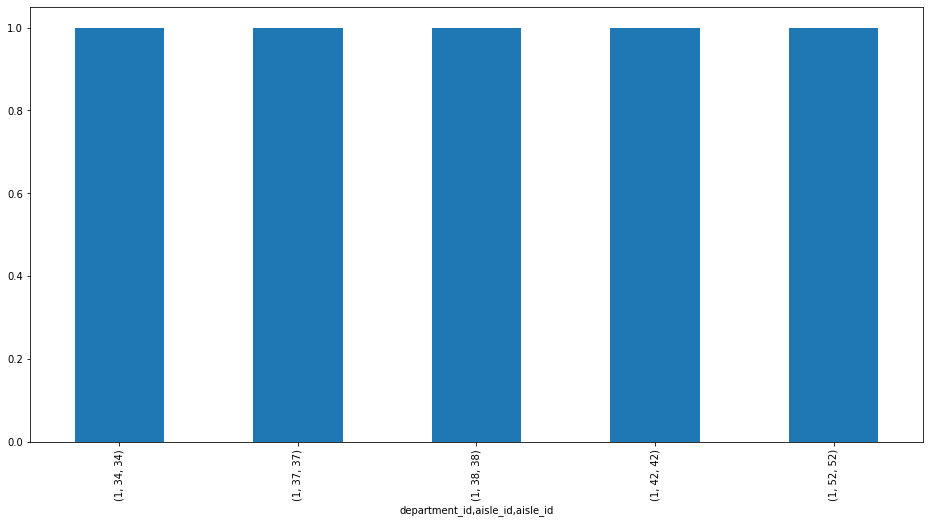

In [74]:
#value_counts()
#group by department_id, aisle_id
plt.figure(figsize=(16,8))
new.groupby(['department_id','aisle_id'])['aisle_id'].value_counts('order_id').head(5).plot.bar()
plt.show()

aisle_id is 34.

4. Draw a pie chart for the number of orders in each departments

In [75]:
# Syntax: matplotlib.pyplot.pie(data, explode=None, 
#         labels=None, colors=None, autopct=None, shadow=False)
labels = new['department'].unique().tolist()
counts = new['order_id'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,  autopct='%1.1f%%',shadow=True) 
ax1.axis('equal')
plt.show()


   

KeyError: 'deli'

ValueError: 'explode' must be of length 'x'

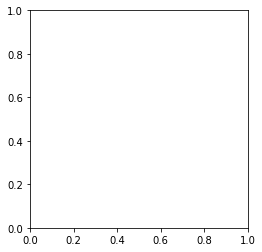

In [58]:
# matplotlib.pyplot.pie(data, explode=None, labels=None, colors=None, autopct=None, shadow=False)
labels = new['department'].unique().tolist()
counts = new['order_id'].value_counts()
plt.pie(counts, labels)
plt.show()